In [33]:
import datetime
import pickle
import os

import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials 

from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib

%matplotlib inline

# Spotify search and add to playlist

In [ ]:
playlist_id = "3Xb3aYX1GxEAvfRA9DWvgH"

In [32]:
sp = spotipy.Spotify() 
client_credentials_manager = SpotifyClientCredentials(client_id=os.environ["SPOTIPY_CLIENT_ID"], client_secret=os.environ["SPOTIPY_CLIENT_SECRET"]) 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

results = sp.search(q='Last Christmas', type='track')
items = results['tracks']['items']

while results['tracks']['next']:
    results = sp.next(results['tracks'])
    items += results['tracks']['items']

In [ ]:
scope = 'playlist-modify-private'
token = util.prompt_for_user_token(os.environ["SPOTIFY_USERNAME"], scope)

sp = spotipy.Spotify(auth=token)
for index in range(0, len(list(true_christmas.Id)), 100):
    results = sp.user_playlist_add_tracks(os.environ["SPOTIFY_USERNAME"], playlist_id, true_christmas.Id[index:index+100])

In [76]:
pickle.dump(items, open("last-christmas-2018.pickle", "wb"))

# Data frame

In [77]:
items = pickle.load(open("last-christmas-2018.pickle", "rb"))
df = pd.DataFrame(data=[(item['id'], item['name'], ", ".join(sorted([a['name'] for a in item['artists']])), item['album']['name']) for item in items], columns=['Id', 'Name', 'Artists', 'Album'])
df = df[df.Name.str.contains('LAST CHRISTMAS', case=False)]

## Number of tracks
How many tracks did we find this year?

In [75]:
df.Id.count()

5062

## Unique artists
Number of unique artists with a song called Last Christmas

In [59]:
len(df.Artists.unique())

1808

## Distribution of released tracks by artist
How is the number of songs distributed on the artists?

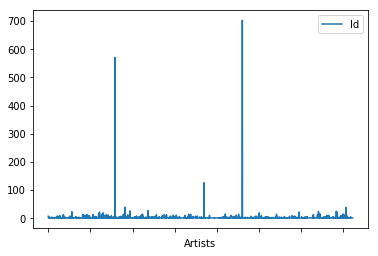

In [60]:
df[['Artists', 'Id']].groupby(['Artists']).agg('count').plot()

## Top ten artists
Of all the artists which are the ten with the most tracks?

In [67]:
df[['Artists', 'Id']].groupby(['Artists']).agg('count').sort_values(['Id', 'Artists'], ascending=False)[:10]

,Id
Artists,
New York Jazz Trio,703
City Jazz Singers,571
KnightsBridge,126
"DJ Favorite, Laura Grig",39
Xmas Boyz,38
"Fab, X-Mas Allstars",27
Dario Daneluz,26
Urban Swing Workers,25
The Merry Christmas Players,24


## Number of tracks by Wham!
How many originals are there?

In [73]:
df[df.Artists.str.match('Wham!', case=False)].Id.count()

10